In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d mostafaabla/garbage-classification

 99% 237M/239M [00:01<00:00, 129MB/s]
100% 239M/239M [00:01<00:00, 126MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/garbage-classification.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [5]:
garbage_folder=os.listdir('/content/garbage_classification')
print(garbage_folder)
print(len(garbage_folder))

['brown-glass', 'paper', 'cardboard', 'metal', 'green-glass', 'clothes', 'plastic', 'trash', 'white-glass', 'shoes', 'battery', 'biological']
12


In [6]:
data=[]

In [7]:
for i in range(12):
  folder_path='/content/garbage_classification/'+garbage_folder[i]
  img_folder=os.listdir(folder_path)
  l=len(img_folder)
  for j in range(l):
    img_path=folder_path+'/'+img_folder[j]
    img_pillow=Image.open(img_path)
    img_color=img_pillow.convert('RGB')
    img_resize=img_color.resize((64,64))
    img_arr=np.array(img_resize)
    data.append([img_arr,i])

In [8]:
x=[]
y=[]
for i,j in data:
  x.append(i)
  y.append(j)

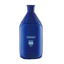

In [9]:
cv2_imshow(x[0])

In [10]:
y[0]

0

In [11]:
import random
random.shuffle(data)

In [12]:
x1=[]
y1=[]
for i,j in data:
  x1.append(i)
  y1.append(j)

In [13]:
x=np.array(x1)
y=np.array(y1)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

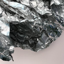

In [16]:
cv2_imshow(x_train[0])

In [17]:
max(y_train)

11

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
num_of_classes=12
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(x_train_scaled,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
350/350 [==============================] - 2s 7ms/step - loss: 0.2440 - accuracy: 0.9216 - val_loss: 1.5070 - val_accuracy: 0.7520
Epoch 2/20
350/350 [==============================] - 2s 6ms/step - loss: 0.2467 - accuracy: 0.9226 - val_loss: 1.5868 - val_accuracy: 0.7625
Epoch 3/20
350/350 [==============================] - 2s 7ms/step - loss: 0.2344 - accuracy: 0.9244 - val_loss: 1.6965 - val_accuracy: 0.7110
Epoch 4/20
350/350 [==============================] - 4s 11ms/step - loss: 0.2415 - accuracy: 0.9238 - val_loss: 1.4934 - val_accuracy: 0.7472
Epoch 5/20
350/350 [==============================] - 4s 11ms/step - loss: 0.2352 - accuracy: 0.9239 - val_loss: 1.7393 - val_accuracy: 0.7472
Epoch 6/20
350/350 [==============================] - 2s 7ms/step - loss: 0.2419 - accuracy: 0.9243 - val_loss: 1.6630 - val_accuracy: 0.7319
Epoch 7/20
350/350 [==============================] - 2s 6ms/step - loss: 0.2415 - accuracy: 0.9260 - val_loss: 1.5961 - val_accuracy: 0.7544
Epoc

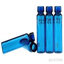

1/1 [==============================] - 0s 29ms/step
The item is brown-glass


In [62]:
img_path='/content/garbage_classification/brown-glass/brown-glass1.jpg'
img_pillow=Image.open(img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((64,64))
img_arr=np.array(img_resize)
cv2_imshow(img_arr)
img_scaled=img_arr/255
img_reshape=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshape)
output=np.argmax(prediction)
if(output==0):
  print('The item is brown-glass')
elif(output==1):
  print('The item is paper')
elif(output==2):
  print('The item is cardboard')
elif(output==3):
  print('The item is metal')
elif(output==4):
  print('The item is green-glass')
elif(output==5):
  print('The item is clothes')
elif(output==6):
  print('The item is plastic')
elif(output==7):
  print('The item is trash')
elif(output==8):
  print('The item is white-glass')
elif(output==9):
  print('The item is shoes')
elif(output==10):
  print('The item is battery')
elif(output==11):
  print('The item is biological')
